In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from statsmodels.stats.weightstats import ztest
import scipy.stats as stats
import seaborn as sns

In [2]:

import os
os.listdir('../Фінальний проект/')

['archive',
 'archive.zip',
 'final project.ipynb',
 'healthcare-dataset-stroke-data.csv']

In [3]:
data_path = '../Фінальний проект/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(data_path)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Delete lines with at least one missing value and save it in new dataframe

In [4]:
clean_df = df.dropna().copy()
clean_df



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Сheck if there are duplicates in the data

In [5]:
duplicates_count = clean_df.duplicated().sum()
print("Q-ty of duplicates:", duplicates_count)

Q-ty of duplicates: 0


Check missing values 

In [6]:
clean_df.isnull().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Check data type of dataset

In [7]:
clean_df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
print(clean_df.describe())

                 id          age  hypertension  heart_disease  \
count   4909.000000  4909.000000   4909.000000    4909.000000   
mean   37064.313506    42.865374      0.091872       0.049501   
std    20995.098457    22.555115      0.288875       0.216934   
min       77.000000     0.080000      0.000000       0.000000   
25%    18605.000000    25.000000      0.000000       0.000000   
50%    37608.000000    44.000000      0.000000       0.000000   
75%    55220.000000    60.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        4909.000000  4909.000000  4909.000000  
mean          105.305150    28.893237     0.042575  
std            44.424341     7.854067     0.201917  
min            55.120000    10.300000     0.000000  
25%            77.070000    23.500000     0.000000  
50%            91.680000    28.100000     0.000000  
75%           113.570000    33.100000     0

In [9]:
clean_df['age'] = clean_df['age'].round().astype(int)

In [10]:
print(clean_df.describe())

                 id          age  hypertension  heart_disease  \
count   4909.000000  4909.000000   4909.000000    4909.000000   
mean   37064.313506    42.865553      0.091872       0.049501   
std    20995.098457    22.554865      0.288875       0.216934   
min       77.000000     0.000000      0.000000       0.000000   
25%    18605.000000    25.000000      0.000000       0.000000   
50%    37608.000000    44.000000      0.000000       0.000000   
75%    55220.000000    60.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        4909.000000  4909.000000  4909.000000  
mean          105.305150    28.893237     0.042575  
std            44.424341     7.854067     0.201917  
min            55.120000    10.300000     0.000000  
25%            77.070000    23.500000     0.000000  
50%            91.680000    28.100000     0.000000  
75%           113.570000    33.100000     0

In [11]:
for col in clean_df.columns.drop(['age', 'id', 'avg_glucose_level', 'bmi']):
    print(f"Column: {col}")
    print(clean_df[col].unique())
    print("––––––––––––––––––––––––––––")

Column: gender
['Male' 'Female' 'Other']
––––––––––––––––––––––––––––
Column: hypertension
[0 1]
––––––––––––––––––––––––––––
Column: heart_disease
[1 0]
––––––––––––––––––––––––––––
Column: ever_married
['Yes' 'No']
––––––––––––––––––––––––––––
Column: work_type
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
––––––––––––––––––––––––––––
Column: Residence_type
['Urban' 'Rural']
––––––––––––––––––––––––––––
Column: smoking_status
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
––––––––––––––––––––––––––––
Column: stroke
[1 0]
––––––––––––––––––––––––––––


In [12]:
count_other = clean_df[clean_df['gender'] == 'Other'].shape[0]
print("Кількість рядків з gender == 'Other':", count_other)

Кількість рядків з gender == 'Other': 1


In [13]:
other_rows = clean_df[clean_df['gender'] == 'Other']
print(other_rows)

         id gender  age  hypertension  heart_disease ever_married work_type  \
3116  56156  Other   26             0              0           No   Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
3116          Rural             143.33  22.4  formerly smoked       0  


In [14]:
idx = clean_df.loc[clean_df['gender'] == 'Other'].index
clean_df.drop(idx, inplace=True)

In [16]:
print("Фінальні розміри датафрейму:", clean_df.shape)

Фінальні розміри датафрейму: (4908, 12)


## 1. Переглянемо скільки людей у вибірці мали інсульт та їх відсоток від загальної вибірки 

In [25]:
total_people = len(clean_df)
print("Загальна кількість людей:", total_people)
total_stroke = clean_df['stroke'].sum()
print("Кількість людей, які перенесли інсульт:", total_stroke)
stroke_percentage = ((total_stroke / total_people) * 100).round(2)
print("Відсоток людей, які перенесли інсульт:", stroke_percentage)

Загальна кількість людей: 4908
Кількість людей, які перенесли інсульт: 209
Відсоток людей, які перенесли інсульт: 4.26


## 2.Який гендер частіше переносить інсульт?

In [206]:
total_by_gender = clean_df.groupby('gender').size()
stroke_by_gender = clean_df.groupby('gender')['stroke'].sum()
stroke_by_gender_percent = ((stroke_by_gender / total_by_gender) * 100).round(2)
stroke_by_gender_percent

gender
Female    4.14
Male      4.43
dtype: float64

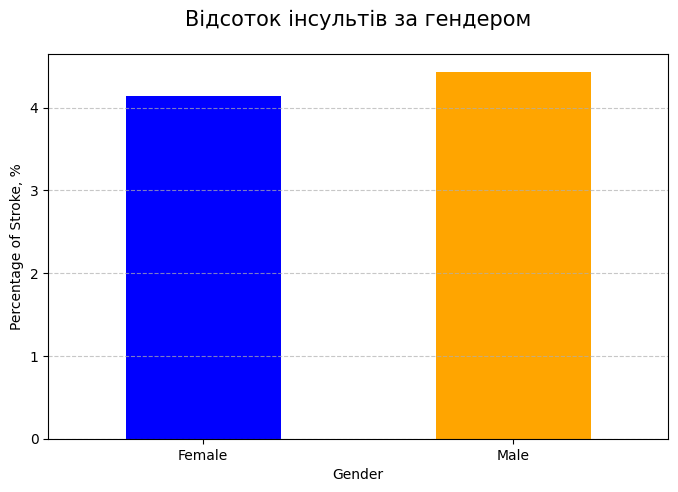

In [207]:
stroke_by_gender_percent.plot(kind='bar', color=['blue', 'orange'], figsize=(8, 5))
plt.title('Відсоток інсультів за гендером', pad=20, fontsize = 15)
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Percentage of Stroke, %')
plt.grid(axis='y', linestyle='--', alpha=0.7)

Висновок: З графіку бачимо, що відсоток інсультів серед жінок є вищим, ніж серед чоловіків. Це може свідчити про те, що гендер є фактором ризику, і жінки частіше схильні до інсульту у вибірці цього дослідження.

## 3.Чи одружені чоловіки та жінки мають більше інсультів?

In [35]:
gender_stroke_percent_married = (clean_df.groupby(['gender', 'ever_married'])['stroke'].mean() * 100).round(2)

print("Відсоток інсультів за гендером та шлюбним статусом")
print(gender_stroke_percent_married)
print()

Відсоток інсультів за гендером та шлюбним статусом
gender  ever_married
Female  No              1.66
        Yes             5.38
Male    No              0.95
        Yes             6.45
Name: stroke, dtype: float64



In [43]:
grouped_unstacked = gender_stroke_percent_married.unstack()

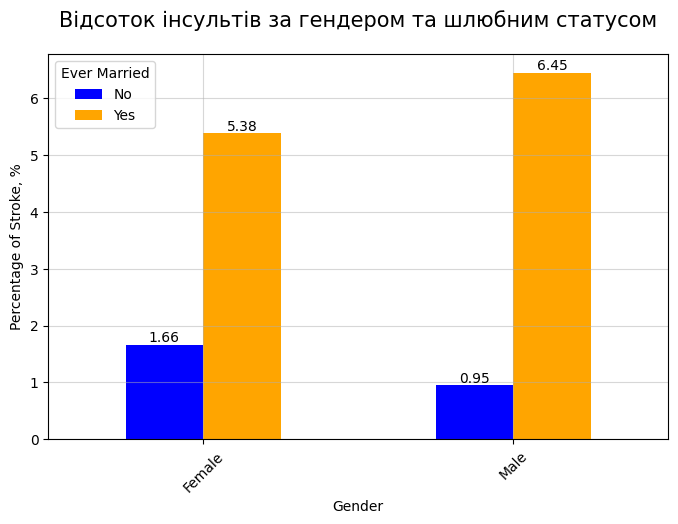

In [135]:
graph = grouped_unstacked.plot(kind='bar', color=['blue', 'orange'], figsize=(8, 5))
plt.title('Відсоток інсультів за гендером та шлюбним статусом', pad=20, fontsize = 15)
plt.ylabel('Percentage of Stroke, %')
plt.xlabel('Gender')
plt.xticks(rotation = 45)
plt.legend(title='Ever Married')
plt.grid(axis='both', alpha=.5) 

for container in graph.containers:
    graph.bar_label(container, fmt='%.2f', label_type='edge')
    
plt.show()

Висновок: Аналіз показав, що як серед чоловіків, так і серед жінок частка інсультів вища у тих, хто одружений. Особливо помітно, що одружені жінки мають дещо вищий відсоток інсультів, ніж одружені чоловіки.Можливий вплив біологічних або соціальних факторів, наприклад рівні стресу.

## 4. Яка залежність між віком та наявністю інсульту?

In [64]:
age_stroke = (clean_df.groupby('age')['stroke'].mean() * 100).round(2)
age_stroke
print("Найбільший відсоток інсультів",max(age_stroke),"% у віці", age_stroke.idxmax(),"років")

Найбільший відсоток інсультів 23.88 % у віці 80 років


In [97]:
age_stroke = clean_df.groupby('stroke')['age'].mean()
print(" Середній вік для груп без інсульту та з інсультом:")
print(age_stroke)

 Середній вік для груп без інсульту та з інсультом:
stroke
0    41.763992
1    67.712919
Name: age, dtype: float64


Перевіримо гіпотезу чи вік впливає на ймовірність інсульту

Перевіримо чи існує статистично значуща різниця у середньому віці пацієнтів, які перенесли інсульт, порівняно з тими хто не мав інсульту.
Нульова гіпотеза (H₀): Середній вік пацієнтів з інсультом не відрізняється від середнього віку пацієнтів без інсульту.
Альтернативна гіпотеза (H₁):Середній вік пацієнтів з інсультом відрізняється від середнього віку пацієнтів без інсульту.

In [81]:
age_stroke_without = clean_df[clean_df['stroke'] == 0]['age']
age_stroke = clean_df[clean_df['stroke'] == 1]['age']
t_stat, p_val = stats.ttest_ind(age_stroke_without, age_stroke, equal_var=False)
print("   Результати t-тесту для віку:")
print(f"   t-stat = {t_stat:.2f}, p-value = {p_val:.2f}\n")

   Результати t-тесту для віку:
   t-stat = -28.29, p-value = 0.00



Оскільки наше $p$-значення=0.000 нижче за $\alpha$ = 0.05, ми можемо відхилити нульову гіпотезу $H_0$, що означає, що cередній вік пацієнтів з інсультом відрізняється від середнього віку пацієнтів без інсульту..

Висновок: Середній вік пацієнтів, які перенесли інсульт, статистично значущо вищий, ніж середній вік тих, хто інсульту не мав.
Це означає, що вік впливає на фактор виникнення інсульту, тому варто робити більш детальні дослідження на вибірці людей віком старше 60 років, тоді ми отримує кращі висновки.

## 5.Чи існує взаємозв’язок між гіпертонією (hypertension), хворобами серця (heart_disease) та інсультом?

In [151]:
hypertension_heart_disease_stroke = clean_df.groupby(['hypertension', 'heart_disease', 'stroke']).size()
hypertension_heart_disease_stroke

hypertension  heart_disease  stroke
0             0              0         4152
                             1          120
              1              0          156
                             1           29
1             0              0          344
                             1           49
              1              0           47
                             1           11
dtype: int64

In [109]:
hypertension_heart_disease_stroke = hypertension_heart_disease_stroke.unstack().fillna(0)

hypertension_heart_disease_stroke_table = hypertension_heart_disease_stroke.apply(lambda x: x / x.sum() * 100, axis=1)

print("Кількість інсультів при різних поєднаннях гіпертонії та хвороб серця:\n", hypertension_heart_disease_stroke)

Кількість інсультів при різних поєднаннях гіпертонії та хвороб серця:
 stroke                         0    1
hypertension heart_disease           
0            0              4152  120
             1               156   29
1            0               344   49
             1                47   11


In [110]:
print("\n Відсотковий розподіл:\n", hypertension_heart_disease_stroke_table, "\n")


 Відсотковий розподіл:
 stroke                              0          1
hypertension heart_disease                      
0            0              97.191011   2.808989
             1              84.324324  15.675676
1            0              87.531807  12.468193
             1              81.034483  18.965517 



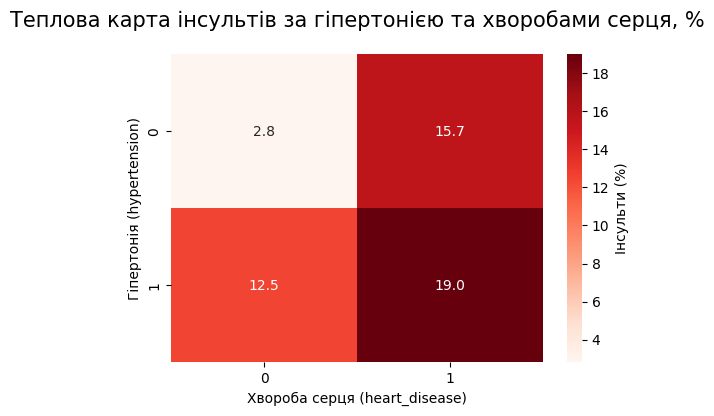

In [132]:
heatmap_data = hypertension_heart_disease_stroke_table[1].unstack()

plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="Reds", cbar_kws={'label': 'Інсульти (%)'})
plt.title("Теплова карта інсультів за гіпертонією та хворобами серця, %", pad=20, fontsize = 15)
plt.xlabel("Хвороба серця (heart_disease)")
plt.ylabel("Гіпертонія (hypertension)")
plt.show()

Висновок: з графіку бачимо, що найменшу к-ть інсультів мають, ті хто немає жодної хвороби 2,8%.
Наявність хочі б однієї з хвороби суттєво підвищує ризик мати інсульт:12,5% - гіпертонія, 15,7% хвороби серця
19% інсульту при двох хворобах одночасно

## 6.Чи впливає куріння на наявність інсульту? 

In [162]:
smoke_stroke = clean_df.groupby('smoking_status')['stroke'].sum()
print(smoke_stroke)

smoking_status
Unknown            29
formerly smoked    57
never smoked       84
smokes             39
Name: stroke, dtype: int64


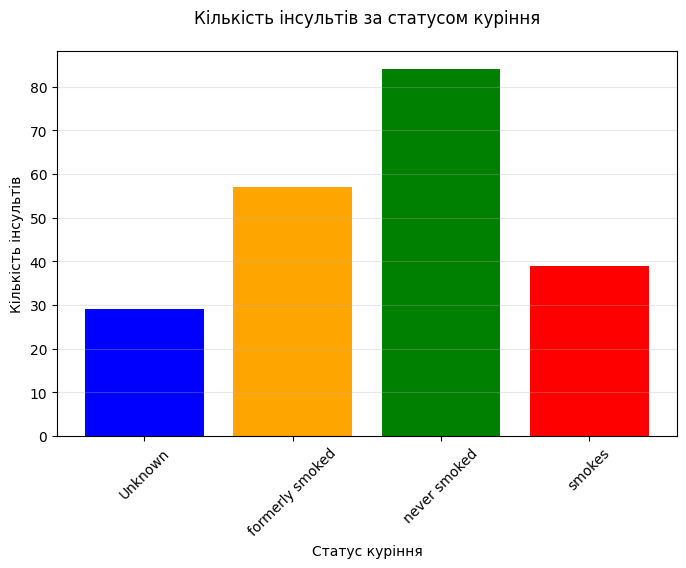

In [218]:
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(smoke_stroke.index, smoke_stroke.values, color=['blue', 'orange', 'green', 'red'])
ax.set_title("Кількість інсультів за статусом куріння", pad=20)
ax.set_ylabel("Кількість інсультів")
ax.set_xlabel("Статус куріння")
plt.xticks(rotation = 45)
plt.grid(axis='y', alpha=0.3)


З графіку можна зробити висновок, що люди, які не курять мають більшу схильність до інсультів, що ставить під сумнів коректність таких висновків.

Перевіримо гіпотезу чи куріння впливає на виникнення інсульту

Нульова гіпотеза (H₀): статус куріння не впливає на виникнення інсульту
Альтернативна гіпотеза (H₁): статус куріння впливає на виникнення інсульту

In [196]:
smoke_stroke_table = clean_df.groupby(['smoking_status','stroke']).size()
smoke_stroke_table = smoke_stroke_table.unstack().fillna(0)

In [180]:
from scipy.stats import chi2_contingency
res = chi2_contingency(smoke_stroke_table)
print("Результати хі-квадрат тесту:", (res.pvalue).round(4))
if res.pvalue < 0.05:
    print("Відмінності між статусами куріння статистично значущі, тому куріння впливає на ймовірність інсульту")

Результати хі-квадрат тесту: 0.0
Відмінності між статусами куріння статистично значущі, тому куріння впливає на ймовірність інсульту


Аналіз показав, що куріння впливає на ймовірність інсульту, тому побудуємо графік відсоток інсультів за статусом куріння, тому що в групах курців та не курців може бути різна чисельність опитуваних

In [191]:
group_smoke_total = clean_df.groupby('smoking_status').size()
group_smoke_total

smoking_status
Unknown            1483
formerly smoked     836
never smoked       1852
smokes              737
dtype: int64

In [189]:
group_smoke = clean_df.groupby('smoking_status')['stroke'].sum()
group_smoke

smoking_status
Unknown            29
formerly smoked    57
never smoked       84
smokes             39
Name: stroke, dtype: int64

In [192]:
stroke_percent = (group_smoke / group_smoke_total) * 100
stroke_percent

smoking_status
Unknown            1.955496
formerly smoked    6.818182
never smoked       4.535637
smokes             5.291723
dtype: float64

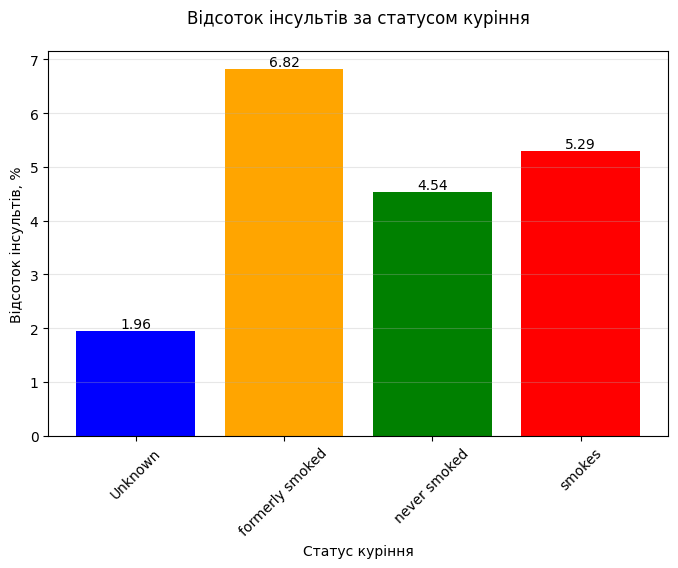

In [219]:
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(stroke_percent.index, stroke_percent.values, color=['blue', 'orange', 'green', 'red'])

ax.set_title("Відсоток інсультів за статусом куріння", pad=20)
ax.set_ylabel("Відсоток інсультів, %")
ax.set_xlabel("Статус куріння")
plt.xticks(rotation = 45)
plt.grid(axis='y', alpha=0.3)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

Висновок: Аналіз показав, що люди, які курили раніше (formerly smoked) або курять зараз (smokes), мають вищий відсоток інсультів, ніж ті, хто ніколи не курив (never smoked). Хоча в абсолютних значеннях найбільше інсультів у некурців, це пояснюється тим, що ця група є найбільш чисельною у вибірці.

Проведений χ²-тест незалежності підтвердив, що існує статистично значущий зв’язок між статусом куріння та інсультом.

## 7 Чи відрізняється середній BMI (індекс маси тіла) у людей з та без інсульту?

In [198]:
bmi_stroke = (clean_df.groupby('stroke')['bmi'].mean()).round(3)
print("Середній BMI для груп без інсульту та з інсультом:") 
print(bmi_stroke)

Середній BMI для груп без інсульту та з інсультом:
stroke
0    28.824
1    30.471
Name: bmi, dtype: float64


Висновок: Індекс маси тіла (BMI) має вплив на ризик інсульту. Люди з вищим BMI частіше мають інсульти

## 8 Чи існує кореляція між середнім рівнем глюкози (avg_glucose_level) та наявністю інсульту?

In [202]:
x = clean_df['avg_glucose_level'].values
y = clean_df['stroke'].values
pirson = np.corrcoef(x,y)
pirson

array([[1.        , 0.13898365],
       [0.13898365, 1.        ]])

Висновок: коефіцієнт кореляції Пірсона = 0.139, що показує слабку кореляцію. Можемо сказати, що рівень глюкози не сильно впливає на ризик виникнення інсульту і потрібно дивитись на інші параметри, або поєднуючи даний показник з іншими хворобами

## 9 Чи існує різниця у відсотку інсультів між міськими та сільськими жителями (Residence_type)?

In [204]:
total_by_residence = df.groupby('Residence_type').size()
stroke_by_residence = df.groupby('Residence_type')['stroke'].sum()
residence_stroke_percent = ((stroke_by_residence / total_by_residence) * 100).round(2)
residence_stroke_percent

Residence_type
Rural    4.53
Urban    5.20
dtype: float64

Висновок: відповідно до отриманих результатів, тип місця проживання (місто чи село) не має суттєвого впливу на ризик виникнення інсульту

## 10 Чи існує різниця у відсотку інсультів між міськими та сільськими жителями (Residence_type)?

In [208]:
total_by_work = df.groupby('work_type').size()
stroke_by_work = df.groupby('work_type')['stroke'].sum()
work_stroke_percent = ((stroke_by_work / total_by_work) * 100).round(2)
work_stroke_percent

work_type
Govt_job         5.02
Never_worked     0.00
Private          5.09
Self-employed    7.94
children         0.29
dtype: float64

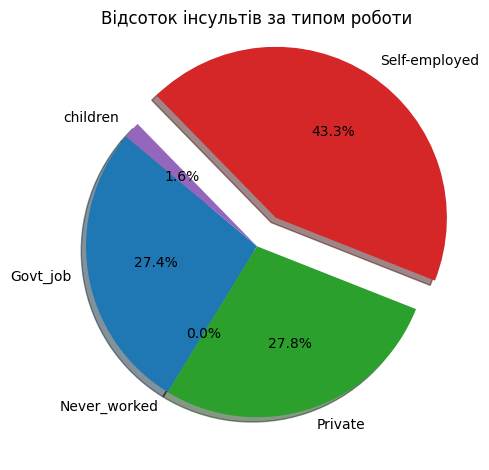

In [217]:

labels = work_stroke_percent.index
sizes = work_stroke_percent.values

explode = [0.2 if val == max(sizes) else 0 for val in sizes]


plt.pie(sizes, labels=labels, explode=explode, shadow=True,
        autopct='%1.1f%%', startangle=140)

plt.title("Відсоток інсультів за типом роботи")
plt.tight_layout()
plt.show()

Висновок: з діаграми видно, що Self-employed — має найбільший ризик виникнення інсульту, а найменший Children та Never_worked.

## Фінальний висновок

У ході аналітичного дослідження були виявлені **ключові фактори**, пов’язані з підвищеним ризиком інсульту:

- Також спостерігається **вищий відсоток інсультів серед жінок**, особливо тих, хто перебуває у шлюбі.
- Люди з **гіпертонією** та/або **серцевими захворюваннями** мають у 3–5 разів вищий ризик інсульту.
- **Старший вік** підвищує ризик інсульту (**p < 0.001**).
- **Куріння** також є фактором ризику, хоча серед некурців більше випадків через велику кількість у вибірці.
- Найвищий відсоток інсультів зафіксовано серед **самозайнятих осіб (self-employed)**.
- Вплив **гіпертонії**, **віку** та **типу зайнятості** є **статистично значущим**.
- Тип проживання (**місто/село**) не має суттєвого впливу на ризик інсульту.

---

## Рекомендації

- Звернути увагу на **групи ризику**: літні люди, пацієнти з хронічними хворобами.
- Впровадити **профілактичні заходи** для людей з гіпертонією та колишніх курців.
- Використовувати **моделі машинного навчання** для прогнозування ризику інсульту на основі ключових факторів.

In [220]:
clean_df.to_csv("clean_data.csv", index=False)